In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

C:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Popularity-Based Recommendation

Popularity-based recommendation is a simple and intuitive method used in recommendation systems to suggest items (such as movies, books, products, etc.) to users based on their overall **popularity**, rather than personalizing recommendations for each user. This method relies on the idea that popular items are likely to be of interest to a wide range of users.

- **Number of Purchases**: How often an item is bought (e.g., best-selling books or products).

- **Number of Views**: How often an item is viewed or visited (e.g., most-viewed movies or articles).

- **Number of Likes or Favorites**: How often an item is liked or favorited (e.g., most-liked songs or videos).

- **Average Rating Score**: The average rating an item receives from users (e.g., highest-rated restaurants or movies).

- **Frequency of Mentions or Shares**: How often an item is mentioned or shared on social media or other platforms (e.g., most-shared news articles).


#### Key Characteristics of Popularity-Based Recommendation

- **Simplicity**:
  - It is straightforward to implement since it does not require complex algorithms or user-specific data. Instead, it uses the popularity of items (e.g., the number of purchases, views, likes, or ratings) to make recommendations.

- **No Personalization**:
  - Recommendations are the same for all users. The system suggests the most popular items regardless of an individual user's preferences or past behavior.

- **Data Requirements**:
  - The system needs data about how frequently each item has been interacted with (e.g., purchased, viewed, liked). There is no need for user-specific data, like past purchases or ratings.

### How Popularity-Based Recommendation Works

1. **Identify a Metric for Popularity**:

   Determine how you will measure the popularity of items. Common metrics include:

   - **Number of Purchases or Views**: How often an item is bought or viewed (e.g., most purchased books or most viewed articles).
   - **Number of Likes or Ratings**: Total likes or ratings an item has received (e.g., highest-rated movies or most liked songs).
   - **Average Rating Score**: The average rating given by users (e.g., books with the highest average rating).
   - **Frequency of Mentions or Shares on Social Media**: How often an item is mentioned or shared on platforms like Twitter, Facebook, or Instagram (e.g., the most shared news articles).
   - **Checkout Rate**: The number of times an item is added to a cart or wish list on an e-commerce platform.
   - **Borrowing Frequency**: How often a book is borrowed from a library or a digital book service.
   - **Review Volume**: The number of reviews an item has, which can indicate its popularity.

2. **Rank Items Based on Popularity**:

   Items are ranked according to the chosen metric. For example, the system might rank products by the number of times they were purchased over the past month or books by the highest number of likes and reviews.

3. **Recommend the Top-N Popular Items**:

   The system recommends the top-N most popular items to users. For example, if you are building a recommendation engine for an e-commerce website, the system might suggest the top 10 best-selling products to all users or the top 5 most-read books on a reading platform.


### Example of Popularity-Based Recommendation

Consider a streaming platform like **Netflix**, a music service like **Spotify**, or an online bookstore. A popularity-based recommendation might:

- **Movies**: Show the most-watched or top-rated movies currently on the platform to all users. For example, a "Top 10 Movies in the USA Today" list.

- **Music**: Suggest the most-streamed songs or albums, such as a "Top 50 Global Hits" playlist.

- **Books**: Recommend the best-selling or most-reviewed books to all users. For example, a "Top 10 Best-Selling Books of the Month" or "Most Reviewed Books" list.


### Advantages of Popularity-Based Recommendation

- **Ease of Implementation**:
  - No need for complex algorithms, making it easy to deploy and maintain.

- **Effective for New Users (Cold Start Problem)**:
  - Since it does not rely on user-specific data, it is effective when little or no data is available about a user (e.g., new users).

- **Scalability**:
  - Works well for large numbers of users and items because it doesn't need to compute user-item similarities or learn personalized models.

### Limitations of Popularity-Based Recommendation

- **Lack of Personalization**:
  - Since all users receive the same recommendations, the system may not provide relevant suggestions tailored to individual user preferences.

- **Limited Diversity**:
  - Popularity-based recommendations tend to focus on a small subset of items that are already popular, which can lead to reduced diversity in recommendations.

- **Popularity Bias**:
  - It can reinforce the popularity of already popular items while less popular but potentially interesting items may never be discovered by users.

### When to Use Popularity-Based Recommendation

- **New Platforms or Services**:
  - When user data is limited or unavailable (cold start problem).

- **For General Suggestions**:
  - When you want to provide general recommendations that appeal to a broad audience, such as on a homepage or a trending section.

- **Short-Term Promotions**:
  - When promoting items that have short-term popularity or are tied to specific events, such as holiday sales or new movie releases.


In [54]:
data=pd.read_csv('book.csv')

### Dataset Overview

This dataset contains information about book ratings provided by users, along with book details and user locations. Below is an explanation of each column in the dataset:

- **Unnamed: 0**: An unnamed column that appears to be an index column from the original dataset.
- **userID**: A unique identifier for each user who has rated a book.
- **ISBN**: The International Standard Book Number, a unique identifier for each book.
- **bookRating**: The rating given by the user to the book, typically on a scale (e.g., 0 to 10).
- **bookTitle**: The title of the book being rated.
- **totalRatingCount**: The total number of ratings the book has received from all users.
- **Location**: The geographic location of the user, usually including city, state, and country.

This dataset can be used to analyze user preferences, book popularity, and geographical patterns in book ratings.


In [55]:
data.head(10)

,Unnamed: 0,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"
5,5,23768,034545104X,0,Flesh Tones: A Novel,60,"st. louis, missouri, usa"
6,6,28266,034545104X,0,Flesh Tones: A Novel,60,"portland, oregon, usa"
7,7,28523,034545104X,0,Flesh Tones: A Novel,60,"springfield, missouri, usa"
8,8,50403,034545104X,9,Flesh Tones: A Novel,60,"conway, arkansas, usa"
9,9,56157,034545104X,0,Flesh Tones: A Novel,60,"florissant, missouri, usa"


In [56]:
# Calculate how many times each book title appears in the data
book_title_counts = data['bookTitle'].value_counts().reset_index()
book_title_counts.columns = ['bookTitle', 'count']

# Display the result using the print function
book_title_counts.head(10)  # Display the first few rows for brevity


,bookTitle,count
0,Wild Animus,1436
1,The Lovely Bones: A Novel,1052
2,The Da Vinci Code,745
3,A Painted House,736
4,The Summons,594
5,The Pilot's Wife : A Novel,506
6,Harry Potter and the Sorcerer's Stone (Harry P...,502
7,The Joy Luck Club,457
8,She's Come Undone (Oprah's Book Club),422
9,She's Come Undone (Oprah's Book Club (Paperback)),407


In [6]:
# Top N books interms of highest average rating

In [57]:
pd.DataFrame(data.groupby(['bookTitle'])['bookRating'].mean()
             .sort_values(ascending=False))

,bookRating
bookTitle,
Das Parfum: Die Geschichte Eines Morders,10.000000
Matilda,8.000000
Harry Potter and the Chamber of Secrets (Book 2),6.720588
MÃ?Â¶rder ohne Gesicht.,6.500000
Ender's Game (Ender Wiggins Saga (Paperback)),5.857143
...,...
The Law of Love,1.000000
Legend,0.777778
Hannibal,0.000000


In [58]:
pop_table=pd.DataFrame(data.groupby(['bookTitle']).agg({'bookRating':'mean',
                                             'totalRatingCount':'count'}))


In [59]:
top_sug=pop_table[pop_table['totalRatingCount']>100].sort_values('bookRating',
                                                         ascending=False)
top_sug.head(5)

,bookRating,totalRatingCount
bookTitle,,
Harry Potter and the Chamber of Secrets (Book 2),6.720588,136
Harry Potter and the Order of the Phoenix (Book 5),5.565693,274
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),4.850598,502
To Kill a Mockingbird,4.761329,331
The Da Vinci Code,4.699329,745


### Final Verdict

<span style="color:blue">Books like the "Harry Potter" series dominate the popularity-based recommendation due to their high average ratings and considerable number of ratings, indicating widespread popularity among users.</span>


In [9]:
# Content Based Recommondation

In [4]:
import pandas as pd

In [5]:
data1=pd.read_csv('movie_metadata.csv')
data1.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [6]:
data1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
# Fill NaN values in the 'genres' column and count unique genre combinations
unique_genres = data1['genres'].dropna().unique()

# Number of unique genre combinations
num_unique_genres = len(unique_genres)

# Display the unique genre combinations and their count
print(unique_genres[:10]) 
print(num_unique_genres)


['Action|Adventure|Fantasy|Sci-Fi' 'Action|Adventure|Fantasy'
 'Action|Adventure|Thriller' 'Action|Thriller' 'Documentary'
 'Action|Adventure|Sci-Fi' 'Action|Adventure|Romance'
 'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance'
 'Adventure|Family|Fantasy|Mystery' 'Action|Adventure']
914


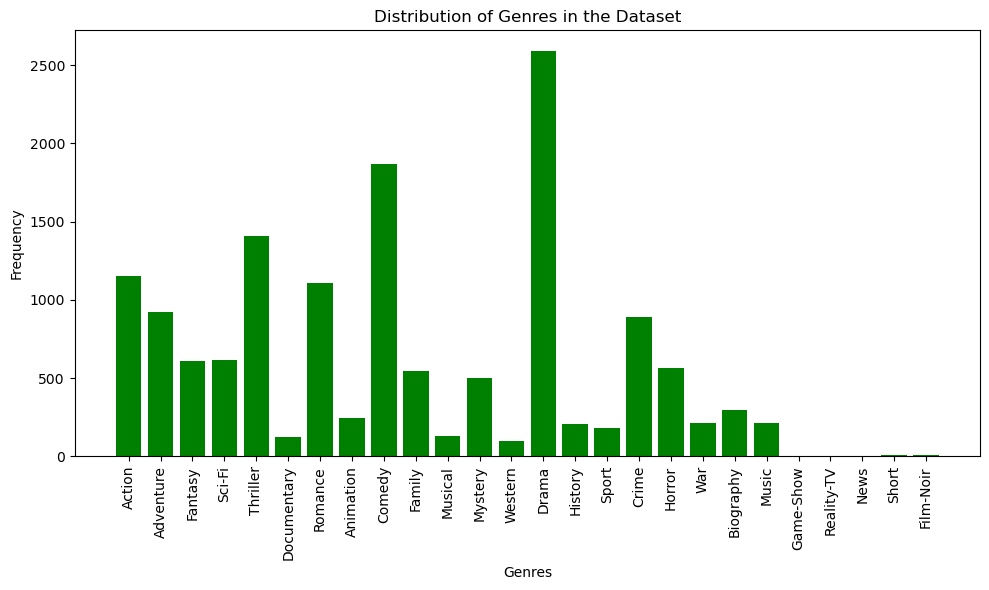

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Split the genres by '|' and flatten the list to get individual genres
all_genres = data1['genres'].dropna().str.split('|').sum()

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Plot the distribution of genres
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.keys(), genre_counts.values(),color='green')
plt.title('Distribution of Genres in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


In [12]:
#data1[['movie_title','genres']]

In [9]:
genres=data1['genres'].str.split('|',expand=True)
genres=genres.iloc[:,0:3]
genres.columns=['genre1','genre2','genre3']

In [10]:
genres.head(10)

,genre1,genre2,genre3
0,Action,Adventure,Fantasy
1,Action,Adventure,Fantasy
2,Action,Adventure,Thriller
3,Action,Thriller,None
4,Documentary,None,None
5,Action,Adventure,Sci-Fi
6,Action,Adventure,Romance
7,Adventure,Animation,Comedy
8,Action,Adventure,Sci-Fi
9,Adventure,Family,Fantasy


In [11]:
data2=data1[['movie_title','content_rating','imdb_score']]

In [12]:
data_final=pd.concat([data2,genres],axis=1)

In [13]:
data_final.head(5)

,movie_title,content_rating,imdb_score,genre1,genre2,genre3
0,Avatar,PG-13,7.9,Action,Adventure,Fantasy
1,Pirates of the Caribbean: At World's End,PG-13,7.1,Action,Adventure,Fantasy
2,Spectre,PG-13,6.8,Action,Adventure,Thriller
3,The Dark Knight Rises,PG-13,8.5,Action,Thriller,None
4,Star Wars: Episode VII - The Force Awakens ...,NaN,7.1,Documentary,None,None


In [14]:
data_final.isnull().sum()

movie_title          0
content_rating     303
imdb_score           0
genre1               0
genre2             633
genre3            1988
dtype: int64

In [15]:
data_final.head()

,movie_title,content_rating,imdb_score,genre1,genre2,genre3
0,Avatar,PG-13,7.9,Action,Adventure,Fantasy
1,Pirates of the Caribbean: At World's End,PG-13,7.1,Action,Adventure,Fantasy
2,Spectre,PG-13,6.8,Action,Adventure,Thriller
3,The Dark Knight Rises,PG-13,8.5,Action,Thriller,None
4,Star Wars: Episode VII - The Force Awakens ...,NaN,7.1,Documentary,None,None


In [16]:
data_final['genre2']=data_final['genre2'].fillna('NA')
data_final['genre3']=data_final['genre3'].fillna('NA')
data_final['content_rating']=data_final['content_rating'].fillna('NA')

In [17]:
data_final.isnull().sum().sum()

0

In [18]:
data_final=data_final.set_index(data_final['movie_title'])

In [19]:
data_final.head()

,movie_title,content_rating,imdb_score,genre1,genre2,genre3
movie_title,,,,,,
Avatar,Avatar,PG-13,7.9,Action,Adventure,Fantasy
Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,PG-13,7.1,Action,Adventure,Fantasy
Spectre,Spectre,PG-13,6.8,Action,Adventure,Thriller
The Dark Knight Rises,The Dark Knight Rises,PG-13,8.5,Action,Thriller,NA
Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens ...,NA,7.1,Documentary,NA,NA


In [20]:
data_final=data_final.drop('movie_title',axis=1)

In [21]:
data_final_dum=pd.get_dummies(data_final)

In [22]:
data_final_dum.head()

,imdb_score,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NA,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,...,genre3_NA,genre3_News,genre3_Reality-TV,genre3_Romance,genre3_Sci-Fi,genre3_Short,genre3_Sport,genre3_Thriller,genre3_War,genre3_Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,7.9,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Pirates of the Caribbean: At World's End,7.1,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Spectre,6.8,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
The Dark Knight Rises,8.5,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
Star Wars: Episode VII - The Force Awakens,7.1,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [23]:
# Apply pd.get_dummies() to create dummy variables
data_final_dum = pd.get_dummies(data_final)

# Convert any boolean columns to integers (if any exist)
data_final_dum = data_final_dum.astype(int)
data_final_dum.head()

,imdb_score,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NA,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,...,genre3_NA,genre3_News,genre3_Reality-TV,genre3_Romance,genre3_Sci-Fi,genre3_Short,genre3_Sport,genre3_Thriller,genre3_War,genre3_Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: At World's End,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,8,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Star Wars: Episode VII - The Force Awakens,7,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.neighbors import NearestNeighbors

cont_model=NearestNeighbors(metric='cosine')
cont_model.fit(data_final_dum)

NearestNeighbors(metric='cosine')

In [25]:
distance_matrix = cont_model.kneighbors_graph(data_final_dum).toarray()
print(distance_matrix.shape)

(5043, 5043)


In [26]:
data_final_dum.shape

(5043, 90)

In [27]:
data_final_dum.index=data_final_dum.index.str.strip()
data_final_dum.index

Index(['Avatar', 'Pirates of the Caribbean: At World's End', 'Spectre',
       'The Dark Knight Rises', 'Star Wars: Episode VII - The Force Awakens',
       'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron',
       'Harry Potter and the Half-Blood Prince',
       ...
       'Primer', 'Cavite', 'El Mariachi', 'The Mongol King', 'Newlyweds',
       'Signed Sealed Delivered', 'The Following', 'A Plague So Pleasant',
       'Shanghai Calling', 'My Date with Drew'],
      dtype='object', name='movie_title', length=5043)

In [28]:
query_movie='Avatar'
data_final_dum.loc['Avatar'].values.reshape(1,-1)

array([[7, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [30]:
query_movie='Avatar'
test_data=data_final_dum.loc[query_movie].values.reshape(1,-1)
dist,ind=cont_model.kneighbors(test_data,n_neighbors=6)

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [37]:
ind[0]

array([ 31, 130,  15, 108,  21, 210], dtype=int64)

In [39]:
# Find the 6 nearest neighbors
dist, ind = cont_model.kneighbors(test_data, n_neighbors=6)

# Print the distances and the corresponding indices
for i in range(len(ind[0])):
    movie_index = ind[0][i]
    distance = dist[0][i]
    print(f"Movie Index: {movie_index}, Distance: {distance}")


Movie Index: 31, Distance: 0.0
Movie Index: 130, Distance: 0.0
Movie Index: 15, Distance: 0.0
Movie Index: 108, Distance: 0.0
Movie Index: 21, Distance: 0.0
Movie Index: 210, Distance: 0.0


C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [35]:
indices = [31, 130, 15, 108, 21, 210]
movie_names = data_final_dum.index[indices]
print(movie_names)


Index(['Spider-Man 2', 'Thor', 'Man of Steel', 'Warcraft',
       'The Amazing Spider-Man', 'X-Men 2'],
      dtype='object', name='movie_title')


In [46]:
query_movie='Spectre'
test_data=data_final_dum.loc[query_movie].values.reshape(1,-1)
dist,ind=cont_model.kneighbors(test_data,n_neighbors=6)
print('The top 5 recommondation for the person who watched ',query_movie, ' is:')
list(data_final_dum.index[ind[0]])[1:]

The top 5 recommondation for the person who watched  Spectre  is:


['Mission: Impossible II',
 'Die Another Day',
 'The Expendables 3',
 'The Bourne Legacy',
 'Mission: Impossible III']